**I. Датасет:**

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


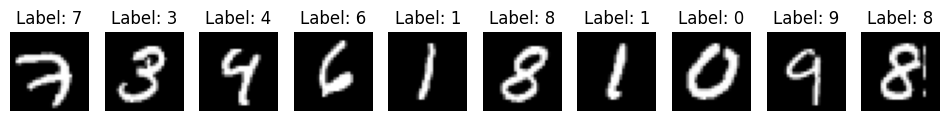

In [14]:
from mnist import load_mnist
import numpy as np
import matplotlib.pyplot as plt

# Загрузка базы данных MNIST
train, validation, test = load_mnist()
X, labels = train

# Вывод нескольких примеров картинок из X
count = 10

# Создание сетки для отображения нескольких картинок
fig, axes = plt.subplots(1, count, figsize=(12, 3))

# Отображение каждой картинки
for i in range(count):
    ax = axes[i]
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {labels[i]}')
    ax.axis('off')

plt.show()

II. **Алгоритм PCA**

In [15]:
import numpy as np

class my_PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.eigenvalues = None  # Добавляем атрибут eigenvalues

    def fit(self, X):
        # Шаг 1: Центрирование данных
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Шаг 2: Вычисление матрицы ковариации
        covariance_matrix = np.dot(X_centered.T, X_centered) / len(X_centered)

        # Шаг 3: Вычисление собственных векторов и значений
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        idx = np.argsort(eigenvalues)[::-1]  # Сортировка в порядке убывания
        self.components = eigenvectors[:, idx][:, :self.n_components]
        self.eigenvalues = eigenvalues[idx]  # Заполняем атрибут eigenvalues

    def transform(self, X):
        # Шаг 4: Преобразование данных в новое пространство
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)


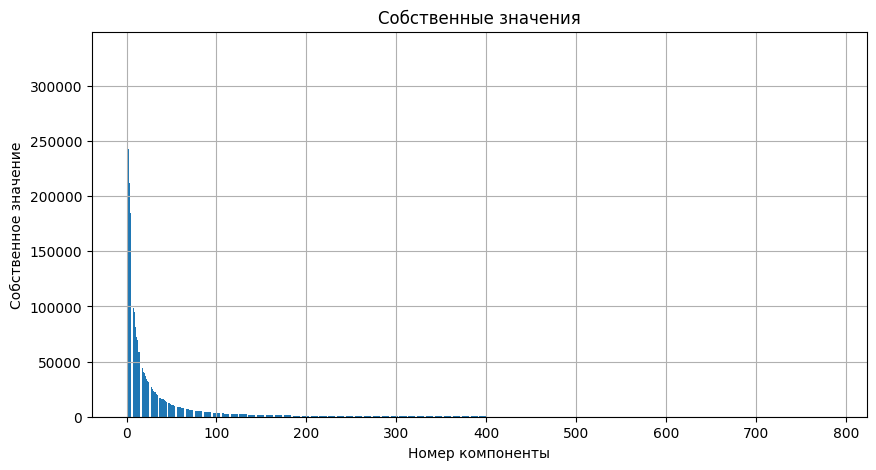

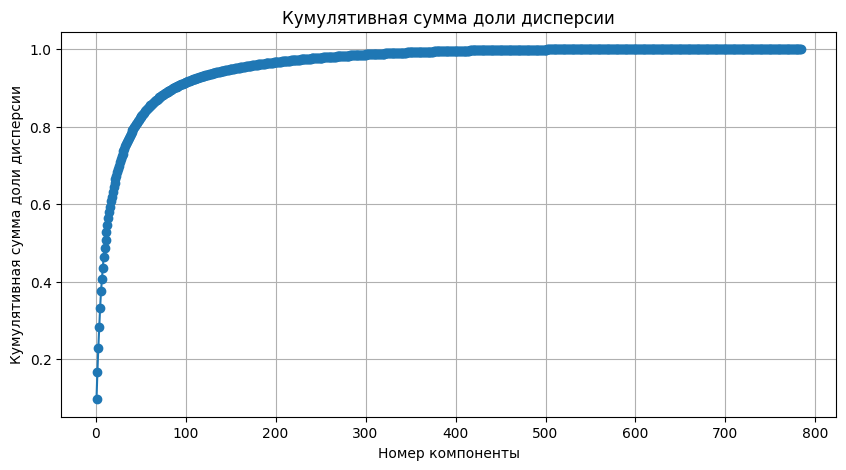

In [16]:
import matplotlib.pyplot as plt

# Преобразуем данные в одномерные векторы
X_processed = X.reshape(X.shape[0], -1)

# Создаем экземпляр класса my_PCA и обучаем модель на данных X_processed
pca = my_PCA(n_components=15)
pca.fit(X_processed)

# Получаем собственные значения
eigenvalues = pca.eigenvalues

# Отсортируем собственные значения в порядке убывания (если они не отсортированы)
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# Построим график собственных значений
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(eigenvalues_sorted) + 1), eigenvalues_sorted)
plt.xlabel('Номер компоненты')
plt.ylabel('Собственное значение')
plt.title('Собственные значения')
plt.grid(True)
plt.show()

# Вычислим долю дисперсии, покрываемой каждой компонентой
explained_variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted)

# Вычислим кумулятивную сумму доли дисперсии
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Построим график отношения кумулятивной суммы к полной сумме
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(eigenvalues_sorted) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Номер компоненты')
plt.ylabel('Кумулятивная сумма доли дисперсии')
plt.title('Кумулятивная сумма доли дисперсии')
plt.grid(True)
plt.show()


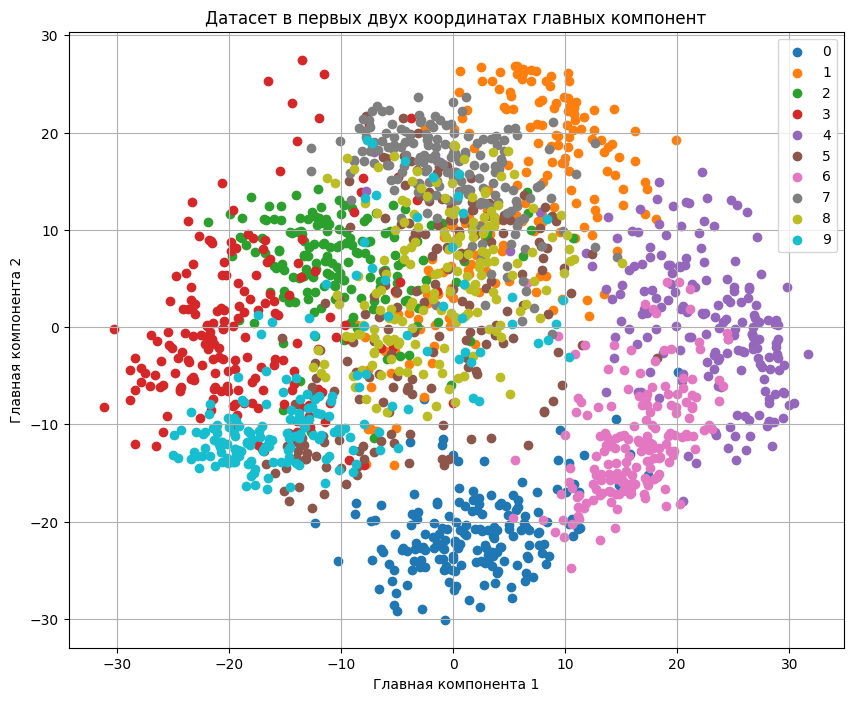

In [22]:
from sklearn.datasets import load_digits

# Загрузка датасета
digits = load_digits()
X = digits.data
y = digits.target

# Обучение модели PCA на датасете
pca = my_PCA(n_components=2)  # Указываем количество компонент (в данном случае - 2)
pca.fit(X)
X_pca = pca.transform(X)

# Изображение точек датасета в первых двух координатах главных компонент
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=str(i))
plt.title('Датасет в первых двух координатах главных компонент')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.legend()
plt.grid(True)
plt.show()


**III. Алгоритм kNN:**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [37]:
class my_kNN:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
            nearest_neighbors = np.argsort(distances)[:self.n_neighbors]
            nearest_labels = self.y_train[nearest_neighbors]
            unique, counts = np.unique(nearest_labels, return_counts=True)
            y_pred.append(unique[np.argmax(counts)])
        return np.array(y_pred)

Точность обычного kNN на тестовой выборке: 0.9861111111111112
Наилучшая точность: 0.9944444444444445
Количество главных компонент: 15
Количество соседей: 8


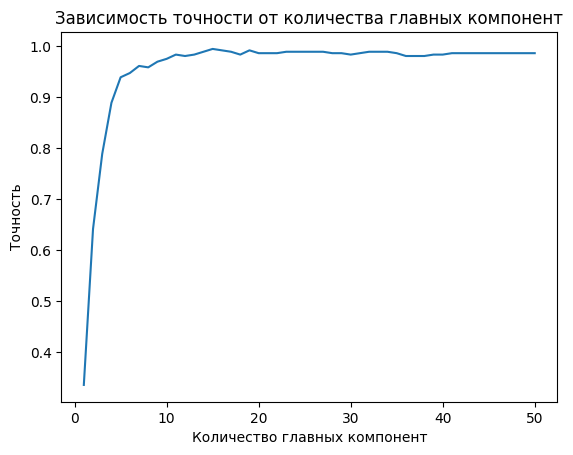

In [38]:
# Загрузка датасета
digits = load_digits()
X = digits.data
y = digits.target

# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение и оценка точности для обычного kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Точность обычного kNN на тестовой выборке:", accuracy)

# Обучение и оценка точности для kNN с PCA
best_accuracy = 0
best_n_components = 0
best_n_neighbors = 0

# Пробуем разное количество главных компонент и соседей
for n_components in range(1, 51):
    for n_neighbors in range(1, 31):
        # Уменьшение размерности данных с помощью PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Обучение классификатора kNN на преобразованных данных
        knn_pca = my_kNN(n_neighbors=n_neighbors)
        knn_pca.fit(X_train_pca, y_train)
        y_pred_pca = knn_pca.predict(X_test_pca)
        accuracy_pca = accuracy_score(y_test, y_pred_pca)

        # Проверка на лучшую точность
        if accuracy_pca > best_accuracy:
            best_accuracy = accuracy_pca
            best_n_components = n_components
            best_n_neighbors = n_neighbors

print("Наилучшая точность:", best_accuracy)
print("Количество главных компонент:", best_n_components)
print("Количество соседей:", best_n_neighbors)

# Построение графика зависимости доли правильных ответов от количества главных компонент
accuracies = []
n_components_values = range(1, 51)
for n_components in n_components_values:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn_pca = my_kNN(n_neighbors=best_n_neighbors)
    knn_pca.fit(X_train_pca, y_train)
    y_pred_pca = knn_pca.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    accuracies.append(accuracy_pca)

plt.plot(n_components_values, accuracies)
plt.xlabel('Количество главных компонент')
plt.ylabel('Точность')
plt.title('Зависимость точности от количества главных компонент')
plt.show()

**Вывод**

В ходе работы были реализованы и применены два основных алгоритма машинного обучения: PCA и kNN.
PCA позволяет снизить размерность данных, что улучшает производительность алгоритмов и может улучшить качество моделей за счет уменьшения эффекта переобучения.
kNN прост в реализации и может быть эффективен для небольших наборов данных, но может столкнуться с проблемами масштабирования для крупных наборов данных и может требовать тщательного выбора параметра k для достижения оптимальной точности.